In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('out.csv')
df_y = df.truncate()
df_ = df.drop(columns=['Day1_Hs', 'Day1_D','Day2_Hs', 'Day2_D','Day3_Hs', 'Day3_D'])
df_train = df_.truncate()
# df_train
# df_train.head()
X_train = df_train.to_numpy()[:-1100]
X_test = df_train.to_numpy()[-1100:]
print(len(df_train.to_numpy()))
print(len(X_train))
print(len(X_test))

X_test[0]

5386
4286
1100


array([1, 2, 0, 0, 1, 0, 1, 2, 0])

In [26]:


# Data-Labeling Procedure

def sleep_score(a):
    if a < 7: return -2
    if a ==7: return -1
    if a == 8: return 1
    if a == 9: return 1
    if a == 10: return 1
    if a == 11: return -1
    if a > 11: return -2

def delay_score(a):
    if a > 2: return -2
    if a == 2: return -1
    if a == 1 or a == 0 or a == -1 : return 0
    if a == -2: return -1
    if a < -2: return -2
    
sc_weight = 2
ev_weight = 1
sl_weight = 3
social_r = -0.05
edu_r = 0.22
game_r = -0.2
max_score = 3
min_score =  -12

df_label = pd.DataFrame(columns = ["Day1_Hs","Day1_D","Day2_Hs","Day2_D","Day3_Hs","Day3_D", "Score"]
                     ,index=[0])

for idx, row in df_y.iterrows():
#     print(row['Sc_Game'])
#     print(period_score(row['Sc_Game']))
    score = []

    score.append(sleep_score(row['Day1_Hs']))
    score.append(delay_score(row['Day1_D']))
    score.append(sleep_score(row['Day2_Hs']))
    score.append(delay_score(row['Day2_D']))
    score.append(sleep_score(row['Day3_Hs']))
    score.append(delay_score(row['Day3_D']))
    wellbeing_score = ((sum(score) - min_score)*10)/(max_score - min_score)
    score.append(wellbeing_score)
    df_label.loc[df_label.index.max()+1] = score

df_label = df_label.drop([0])
# Y = df_label['Score'].to_numpy()

Y_train = df_label['Score'].to_numpy()[:-1100]
Y_test = df_label['Score'].to_numpy()[-1100:]
print(len(df_label['Score'].to_numpy()))
print(len(Y_train))
print(len(Y_test))
Y_test

5386
4286
1100


array([5.33333333, 8.        , 6.        , ..., 2.        , 1.33333333,
       1.33333333])

<class 'pandas.core.series.Series'>


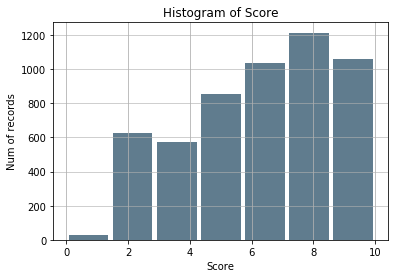

In [27]:
x = df_label['Score']
print(type(x))
x.plot.hist(grid=True, bins=7, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Num of records')
plt.grid(axis='y', alpha=0.75)

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

from tensorflow.keras import backend as K

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


model = tf.keras.Sequential()
model.add(Dense(9, input_shape=(9,), activation = tf.math.square))

model.add(Dense(1))
model.compile(loss='mean_squared_error', metrics=['mean_squared_error',tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mean_absolute_error', r_square], optimizer='adam')
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
# print(model.summary())


# optimizer = tf.keras.optimizers.RMSprop(0.0099)
# model.fit(X,Y,epochs=1000, batch_size=200)

history = model.fit(X_train, Y_train, validation_split= 0.2, epochs=200, batch_size=30, callbacks=[earlystopping] )





Train on 3428 samples, validate on 858 samples
Epoch 1/200
3428/3428 [==============================] - 0s 62us/sample - loss: 35.2137 - mean_squared_error: 35.2137 - rmse: 5.9341 - mean_absolute_error: 5.0039 - r_square: -6.7383 - val_loss: 24.2343 - val_mean_squared_error: 24.2343 - val_rmse: 4.9228 - val_mean_absolute_error: 4.1657 - val_r_square: -3.5981
Epoch 2/200
3428/3428 [==============================] - 0s 36us/sample - loss: 25.0499 - mean_squared_error: 25.0499 - rmse: 5.0050 - mean_absolute_error: 4.1988 - r_square: -4.4156 - val_loss: 19.7841 - val_mean_squared_error: 19.7841 - val_rmse: 4.4479 - val_mean_absolute_error: 3.7262 - val_r_square: -2.6566
Epoch 3/200
3428/3428 [==============================] - 0s 35us/sample - loss: 20.7651 - mean_squared_error: 20.7651 - rmse: 4.5569 - mean_absolute_error: 3.7889 - r_square: -3.5725 - val_loss: 17.3605 - val_mean_squared_error: 17.3605 - val_rmse: 4.1666 - val_mean_absolute_error: 3.4692 - val_r_square: -2.2624
Epoch 4/200

3428/3428 [==============================] - 0s 37us/sample - loss: 5.4100 - mean_squared_error: 5.4100 - rmse: 2.3259 - mean_absolute_error: 1.8911 - r_square: -0.1504 - val_loss: 5.7165 - val_mean_squared_error: 5.7165 - val_rmse: 2.3909 - val_mean_absolute_error: 1.9122 - val_r_square: -0.0391
Epoch 28/200
3428/3428 [==============================] - 0s 35us/sample - loss: 5.2957 - mean_squared_error: 5.2957 - rmse: 2.3012 - mean_absolute_error: 1.8750 - r_square: -0.1305 - val_loss: 5.6268 - val_mean_squared_error: 5.6268 - val_rmse: 2.3721 - val_mean_absolute_error: 1.9045 - val_r_square: -0.0338
Epoch 29/200
3428/3428 [==============================] - 0s 38us/sample - loss: 5.2667 - mean_squared_error: 5.2667 - rmse: 2.2949 - mean_absolute_error: 1.8710 - r_square: -0.1286 - val_loss: 5.5275 - val_mean_squared_error: 5.5275 - val_rmse: 2.3511 - val_mean_absolute_error: 1.8868 - val_r_square: -0.0092
Epoch 30/200
3428/3428 [==============================] - 0s 39us/sample - loss:

3428/3428 [==============================] - 0s 36us/sample - loss: 4.4562 - mean_squared_error: 4.4562 - rmse: 2.1110 - mean_absolute_error: 1.7377 - r_square: 0.0641 - val_loss: 4.9520 - val_mean_squared_error: 4.9520 - val_rmse: 2.2253 - val_mean_absolute_error: 1.8171 - val_r_square: 0.0812
Epoch 54/200
3428/3428 [==============================] - 0s 34us/sample - loss: 4.4470 - mean_squared_error: 4.4470 - rmse: 2.1088 - mean_absolute_error: 1.7411 - r_square: 0.0438 - val_loss: 4.7888 - val_mean_squared_error: 4.7888 - val_rmse: 2.1883 - val_mean_absolute_error: 1.7735 - val_r_square: 0.1166
Epoch 55/200
3428/3428 [==============================] - 0s 46us/sample - loss: 4.4043 - mean_squared_error: 4.4043 - rmse: 2.0986 - mean_absolute_error: 1.7287 - r_square: 0.0656 - val_loss: 4.7941 - val_mean_squared_error: 4.7941 - val_rmse: 2.1895 - val_mean_absolute_error: 1.7817 - val_r_square: 0.1160
Epoch 56/200
3428/3428 [==============================] - 0s 44us/sample - loss: 4.414

3428/3428 [==============================] - 0s 34us/sample - loss: 4.3060 - mean_squared_error: 4.3060 - rmse: 2.0751 - mean_absolute_error: 1.7082 - r_square: 0.0905 - val_loss: 4.6485 - val_mean_squared_error: 4.6485 - val_rmse: 2.1560 - val_mean_absolute_error: 1.7706 - val_r_square: 0.1090
Epoch 80/200
3428/3428 [==============================] - 0s 34us/sample - loss: 4.2770 - mean_squared_error: 4.2770 - rmse: 2.0681 - mean_absolute_error: 1.7032 - r_square: 0.0955 - val_loss: 4.6042 - val_mean_squared_error: 4.6042 - val_rmse: 2.1457 - val_mean_absolute_error: 1.7650 - val_r_square: 0.1514
Epoch 81/200
3428/3428 [==============================] - 0s 38us/sample - loss: 4.2956 - mean_squared_error: 4.2956 - rmse: 2.0726 - mean_absolute_error: 1.7101 - r_square: 0.0799 - val_loss: 4.6531 - val_mean_squared_error: 4.6531 - val_rmse: 2.1571 - val_mean_absolute_error: 1.7625 - val_r_square: 0.1460
Epoch 82/200
3428/3428 [==============================] - 0s 38us/sample - loss: 4.266

3428/3428 [==============================] - 0s 40us/sample - loss: 4.2644 - mean_squared_error: 4.2644 - rmse: 2.0650 - mean_absolute_error: 1.7021 - r_square: 0.0943 - val_loss: 4.6002 - val_mean_squared_error: 4.6002 - val_rmse: 2.1448 - val_mean_absolute_error: 1.7579 - val_r_square: 0.1568
Epoch 106/200
3428/3428 [==============================] - 0s 39us/sample - loss: 4.2656 - mean_squared_error: 4.2656 - rmse: 2.0653 - mean_absolute_error: 1.7014 - r_square: 0.0865 - val_loss: 4.6250 - val_mean_squared_error: 4.6250 - val_rmse: 2.1506 - val_mean_absolute_error: 1.7755 - val_r_square: 0.1402
Epoch 107/200
3428/3428 [==============================] - 0s 39us/sample - loss: 4.2758 - mean_squared_error: 4.2758 - rmse: 2.0678 - mean_absolute_error: 1.7088 - r_square: 0.0882 - val_loss: 4.6626 - val_mean_squared_error: 4.6626 - val_rmse: 2.1593 - val_mean_absolute_error: 1.7787 - val_r_square: 0.1280
Epoch 108/200
3428/3428 [==============================] - 0s 39us/sample - loss: 4.

3428/3428 [==============================] - 0s 39us/sample - loss: 4.2656 - mean_squared_error: 4.2656 - rmse: 2.0653 - mean_absolute_error: 1.7032 - r_square: 0.0900 - val_loss: 4.6111 - val_mean_squared_error: 4.6111 - val_rmse: 2.1473 - val_mean_absolute_error: 1.7645 - val_r_square: 0.1554
Epoch 132/200
3428/3428 [==============================] - 0s 37us/sample - loss: 4.2602 - mean_squared_error: 4.2602 - rmse: 2.0640 - mean_absolute_error: 1.7028 - r_square: 0.0970 - val_loss: 4.7235 - val_mean_squared_error: 4.7235 - val_rmse: 2.1734 - val_mean_absolute_error: 1.7988 - val_r_square: 0.1233
Epoch 133/200
3428/3428 [==============================] - 0s 39us/sample - loss: 4.2490 - mean_squared_error: 4.2490 - rmse: 2.0613 - mean_absolute_error: 1.6991 - r_square: 0.1059 - val_loss: 4.6027 - val_mean_squared_error: 4.6027 - val_rmse: 2.1454 - val_mean_absolute_error: 1.7612 - val_r_square: 0.1591
Epoch 134/200
3428/3428 [==============================] - 0s 37us/sample - loss: 4.

3428/3428 [==============================] - 0s 33us/sample - loss: 4.2461 - mean_squared_error: 4.2461 - rmse: 2.0606 - mean_absolute_error: 1.6995 - r_square: 0.1035 - val_loss: 4.6957 - val_mean_squared_error: 4.6957 - val_rmse: 2.1669 - val_mean_absolute_error: 1.7936 - val_r_square: 0.1343
Epoch 158/200
3428/3428 [==============================] - 0s 34us/sample - loss: 4.2570 - mean_squared_error: 4.2570 - rmse: 2.0633 - mean_absolute_error: 1.6975 - r_square: 0.0928 - val_loss: 4.6444 - val_mean_squared_error: 4.6444 - val_rmse: 2.1551 - val_mean_absolute_error: 1.7871 - val_r_square: 0.1408
Epoch 159/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.2594 - mean_squared_error: 4.2594 - rmse: 2.0638 - mean_absolute_error: 1.7016 - r_square: 0.0955 - val_loss: 4.6141 - val_mean_squared_error: 4.6141 - val_rmse: 2.1481 - val_mean_absolute_error: 1.7698 - val_r_square: 0.1332
Epoch 160/200
3428/3428 [==============================] - 0s 34us/sample - loss: 4.

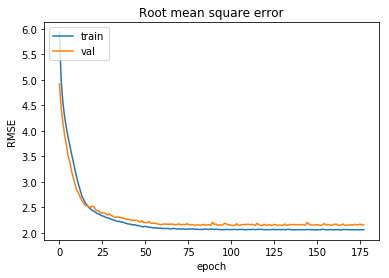

In [29]:

plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root mean square error')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


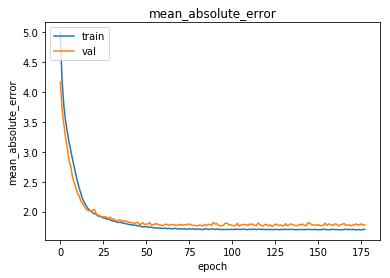

In [30]:

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


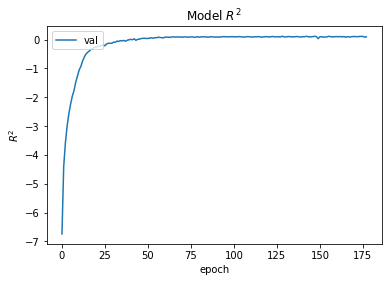

In [31]:
plt.plot(history.history['r_square'])
plt.title('Model $R^2$')
plt.ylabel('$R^2$')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper left')
plt.show()

In [34]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=1100)
print("test loss, test acc:", results)


Evaluate on test data
1100/1100 [==============================] - 0s 3us/sample - loss: 4.4852 - mean_squared_error: 4.4852 - rmse: 2.1178 - mean_absolute_error: 1.7457 - r_square: 0.1171
test loss, test acc: [4.485217094421387, 4.485217, 2.1178331, 1.7457341, 0.117093265]


In [55]:
y_predict = model.predict(X_test)
mean =  Y_test.mean()
a =sum((y_predict - mean)**2)
b = sum((Y_test - mean)**2)
a/b

array([0.24423543], dtype=float32)

In [17]:
# i = 999
# j = 0
# while i < len(df.index):
#     j += 1 
#     _df_train = df_.truncate(before = i+1, after = i+100)
#     i += 100
#     _X = _df_train.to_numpy()
#     _Y = model.predict(_X)
#     X_train = np.concatenate((X_train, _X), axis=0)
#     Y_train = np.append(Y_train,_Y)
#     model.fit(X_train,Y_train, epochs=200, batch_size=20, callbacks=[earlystopping])
#     if j%3 == 0:
#         print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
#               @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
#               @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
#               @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
#               @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
#         results = model.evaluate(X_test, Y_test, batch_size=20)
#         print(results)

In [8]:
# print("Evaluate on test data")
# results = model.evaluate(X_test, Y_test, batch_size=10)
# print("test loss, test acc:", results)


Evaluate on test data
200/200 [==============================] - 0s 65us/sample - loss: 4.3275 - mean_squared_error: 4.3275 - rmse: 2.0803 - mean_absolute_error: 1.6605 - r_square: -0.9635
test loss, test acc: [4.327455842494965, 4.3274555, 2.0802536, 1.6604981, -0.96348655]


In [112]:
model.get_weights()

[array([[-2.36087590e-02, -5.20601034e-01,  3.79112303e-01,
          6.85166866e-02, -2.57370751e-02, -1.94074169e-01,
         -8.70853197e-03,  3.57228220e-01,  3.50797363e-02],
        [ 4.46248800e-02,  1.11133903e-01, -5.28463066e-01,
         -7.41788000e-02,  7.61075467e-02, -3.07507068e-01,
         -2.08253805e-02,  1.19817443e-01, -7.43552744e-02],
        [-2.23592725e-02, -2.75830179e-01, -2.02181607e-01,
         -3.18101980e-02, -4.65674043e-01, -1.54785335e-01,
         -7.97070004e-03, -7.04302788e-01, -3.54508519e-01],
        [-2.07305329e-05, -6.59517109e-01, -1.88920185e-01,
          1.94061212e-02,  2.11506918e-01, -4.03130263e-01,
          6.62487606e-03,  3.16875786e-01,  5.79200447e-01],
        [-2.57243309e-02,  3.01611751e-01,  4.58977133e-01,
          2.39977330e-01, -1.31074879e-02, -4.59236115e-01,
         -1.35173211e-02, -7.41272330e-01,  4.29468714e-02],
        [-5.93085289e-02,  3.11634302e-01,  2.74691582e-01,
          4.55129683e-01, -3.577470

In [113]:
a = np.array([[-2.36087590e-02, -5.20601034e-01,  3.79112303e-01,
          6.85166866e-02, -2.57370751e-02, -1.94074169e-01,
         -8.70853197e-03,  3.57228220e-01,  3.50797363e-02],
        [ 4.46248800e-02,  1.11133903e-01, -5.28463066e-01,
         -7.41788000e-02,  7.61075467e-02, -3.07507068e-01,
         -2.08253805e-02,  1.19817443e-01, -7.43552744e-02],
        [-2.23592725e-02, -2.75830179e-01, -2.02181607e-01,
         -3.18101980e-02, -4.65674043e-01, -1.54785335e-01,
         -7.97070004e-03, -7.04302788e-01, -3.54508519e-01],
        [-2.07305329e-05, -6.59517109e-01, -1.88920185e-01,
          1.94061212e-02,  2.11506918e-01, -4.03130263e-01,
          6.62487606e-03,  3.16875786e-01,  5.79200447e-01],
        [-2.57243309e-02,  3.01611751e-01,  4.58977133e-01,
          2.39977330e-01, -1.31074879e-02, -4.59236115e-01,
         -1.35173211e-02, -7.41272330e-01,  4.29468714e-02],
        [-5.93085289e-02,  3.11634302e-01,  2.74691582e-01,
          4.55129683e-01, -3.57747078e-01, -3.33878756e-01,
         -9.00138356e-03, -5.25740862e-01,  3.66750538e-01],
        [ 1.16910450e-02, -9.27691981e-02,  2.00206220e-01,
         -2.68541705e-02,  1.44670844e-01, -2.10818231e-01,
         -2.22847168e-03, -6.71090186e-02, -1.27368644e-01],
        [ 8.93315766e-03, -3.26891579e-02, -1.48632705e-01,
         -1.29274294e-01,  3.26632857e-01, -1.01819344e-01,
          1.71716306e-02, -1.72078133e-01, -1.70253590e-01],
        [-2.37425696e-02,  2.90112440e-02,  7.23632649e-02,
          4.08127874e-01, -1.93478480e-01, -2.93932587e-01,
          2.12160610e-02,  1.25051379e-01, -4.96561453e-02]])
a.T

array([[-2.36087590e-02,  4.46248800e-02, -2.23592725e-02,
        -2.07305329e-05, -2.57243309e-02, -5.93085289e-02,
         1.16910450e-02,  8.93315766e-03, -2.37425696e-02],
       [-5.20601034e-01,  1.11133903e-01, -2.75830179e-01,
        -6.59517109e-01,  3.01611751e-01,  3.11634302e-01,
        -9.27691981e-02, -3.26891579e-02,  2.90112440e-02],
       [ 3.79112303e-01, -5.28463066e-01, -2.02181607e-01,
        -1.88920185e-01,  4.58977133e-01,  2.74691582e-01,
         2.00206220e-01, -1.48632705e-01,  7.23632649e-02],
       [ 6.85166866e-02, -7.41788000e-02, -3.18101980e-02,
         1.94061212e-02,  2.39977330e-01,  4.55129683e-01,
        -2.68541705e-02, -1.29274294e-01,  4.08127874e-01],
       [-2.57370751e-02,  7.61075467e-02, -4.65674043e-01,
         2.11506918e-01, -1.31074879e-02, -3.57747078e-01,
         1.44670844e-01,  3.26632857e-01, -1.93478480e-01],
       [-1.94074169e-01, -3.07507068e-01, -1.54785335e-01,
        -4.03130263e-01, -4.59236115e-01, -3.338787